In [1]:
import pandas as pd

import string
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

In [2]:
df = pd.read_csv('mergeddataset17-22.csv')
print("Number of tweets: ",len(df['tweet']))
df.head(5)

Number of tweets:  867262


,Unnamed: 0,cashtags,conversation_id,created_at,date,day,geo,hashtags,hour,id,...,trans_src,translate,tweet,urls,user_id,user_id_str,user_rt,user_rt_id,username,video
0,0,[],1574817233255030785,1.664301e+12,2022-09-27 18:44:21,2,NaN,['reinforcementlearning'],18,1574817233255030785,...,NaN,NaN,"Introducing ActorQ, a novel paradigm that uses...",['https://goo.gle/3RgCEUC'],33838201,33838201,NaN,NaN,GoogleAI,1
1,1,[],1573414014574796800,1.663966e+12,2022-09-23 21:48:28,5,NaN,[],21,1573414014574796800,...,NaN,NaN,"Check out the latest updates to Acme, a framew...",[],33838201,33838201,NaN,NaN,GoogleAI,0
2,2,[],1573064656914190337,1.663883e+12,2022-09-22 22:40:14,4,NaN,[],22,1573064656914190337,...,NaN,NaN,"Introducing TensorStore, an open-source C++ an...",['https://goo.gle/3Ly9e30'],33838201,33838201,NaN,NaN,GoogleAI,1
3,3,[],1572706911136677888,1.663798e+12,2022-09-21 22:58:41,3,NaN,[],22,1572706911136677888,...,NaN,NaN,View synthesis — creating new views of a scene...,['https://goo.gle/3ByUKvc'],33838201,33838201,NaN,NaN,GoogleAI,0
4,4,[],1572412801141841920,1.663727e+12,2022-09-21 03:30:00,3,NaN,['interspeech2022'],3,1572412801141841920,...,NaN,NaN,Vetting speech models requires consideration o...,[],33838201,33838201,NaN,NaN,GoogleAI,1


In [3]:
df.dtypes

Unnamed: 0           int64
cashtags            object
conversation_id      int64
created_at         float64
date                object
day                  int64
geo                float64
hashtags            object
hour                 int64
id                   int64
language            object
link                object
name                object
near               float64
nlikes               int64
nreplies             int64
nretweets            int64
photos              object
place              float64
quote_url           object
reply_to            object
retweet               bool
retweet_date       float64
retweet_id         float64
search              object
source             float64
thumbnail           object
timezone             int64
trans_dest         float64
trans_src          float64
translate          float64
tweet               object
urls                object
user_id              int64
user_id_str          int64
user_rt            float64
user_rt_id         float64
u

In [40]:
df.dropna(axis='columns', inplace=True)
df.columns

Index(['Unnamed: 0', 'cashtags', 'conversation_id', 'created_at', 'date',
       'day', 'hashtags', 'hour', 'id', 'language', 'link', 'name', 'nlikes',
       'nreplies', 'nretweets', 'photos', 'reply_to', 'retweet', 'search',
       'timezone', 'tweet', 'urls', 'user_id', 'user_id_str', 'username',
       'video'],
      dtype='object')

In [41]:
df = df[['tweet']]

In [42]:
df.drop_duplicates(inplace=True, subset='tweet')
df.shape

(2320, 1)

In [14]:
import re
import gensim
from nltk.stem import WordNetLemmatizer
punctuation = '!”$%&\’()*+,-./:;<=>?[\\]^_`{|}~•@'

In [15]:
#Removing Links
def remove_links(tweet):
    tweet = re.sub(r'http\S+', '', tweet)   # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet)  # remove bitly links
    tweet = tweet.strip('[link]')   # remove [links]
    tweet = re.sub(r'pic.twitter\S+','', tweet)
    return tweet


In [16]:
#Removing retweet and @user information
def remove_users(tweet):
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove re-tweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove tweeted at
    return tweet

In [17]:
#Removing Hashtags
def remove_hashtags(tweet):
    tweet = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove hash tags
    return tweet

In [18]:
#Removing Audio/Video tags or labels
def remove_av(tweet):
    tweet = re.sub('VIDEO:', '', tweet)  # remove 'VIDEO:' from start of tweet
    tweet = re.sub('AUDIO:', '', tweet)  # remove 'AUDIO:' from start of tweet
    return tweet

In [19]:
#Tokenization
def tokenize(tweet):
    result = []
    for token in gensim.utils.simple_preprocess(tweet):
        if token not in gensim.parsing.preprocessing.STOPWORDS \
                and len(token) > 2:  # drops words with less than 3 characters
            result.append(lemmatize(token))
    return result

In [20]:
#Lemmatization
def lemmatize(token):
    return WordNetLemmatizer().lemmatize(token, pos='v')

In [21]:
#Main function to clean tweets
def preprocess_tweet(tweet):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = remove_hashtags(tweet)
    tweet = remove_av(tweet)
    tweet = tweet.lower()  # lower case
    tweet = re.sub('[' + punctuation + ']+', ' ', tweet)  # strip punctuation
    tweet = re.sub('\s+', ' ', tweet)  # remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers
    tweet_token_list = tokenize(tweet)  # apply lemmatization and tokenization
    tweet = ' '.join(tweet_token_list)
    return tweet

In [22]:
#Another Main function to clean tweets without tokenization or removal of stopwords
def basic_clean(tweet):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = remove_hashtags(tweet)
    tweet = remove_av(tweet)
    tweet = tweet.lower()  # lower case
    tweet = re.sub('[' + punctuation + ']+', ' ', tweet)  # strip punctuation
    tweet = re.sub('\s+', ' ', tweet)  # remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers
    tweet = re.sub('📝 …', '', tweet)
    return tweet

In [23]:
def tokenize_tweets(df):
    df['tokens'] = df.tweet.apply(preprocess_tweet)
    num_tweets = len(df)
    #print('Complete. Number of Tweets that have been cleaned and tokenized : {}'.format(num_tweets))
    return df

In [29]:
import preprocessor
#from preprocessor import tokenizetweets
df = tokenize_tweets(df)
df.head(5)

Complete. Number of Tweets that have been cleaned and tokenized : 2320


,date,timezone,tweet,hashtags,username,name,day,hour,retweet,nlikes,nreplies,nretweets,tokens
0,2022-09-27 18:44:21,0,"Introducing ActorQ, a novel paradigm that uses...",['reinforcementlearning'],GoogleAI,Google AI,2,18,False,394,23,96,introduce actorq novel paradigm use quantizati...
1,2022-09-23 21:48:28,0,"Check out the latest updates to Acme, a framew...",[],GoogleAI,Google AI,5,21,False,152,9,29,check latest update acme framework distribute ...
2,2022-09-22 22:40:14,0,"Introducing TensorStore, an open-source C++ an...",[],GoogleAI,Google AI,4,22,False,2286,40,526,introduce tensorstore open source python libra...
3,2022-09-21 22:58:41,0,View synthesis — creating new views of a scene...,[],GoogleAI,Google AI,3,22,False,173,5,45,view synthesis create new view scene multiple ...
4,2022-09-21 03:30:00,0,Vetting speech models requires consideration o...,['interspeech2022'],GoogleAI,Google AI,3,3,False,158,9,21,vet speech model require consideration metrics...


In [30]:
df.to_csv(r'preprocessed_17_22tweets.csv', index = False,header=True)

In [34]:
df1 = df[['tweet','tokens']]
df1

,tweet,tokens
0,"Introducing ActorQ, a novel paradigm that uses...",introduce actorq novel paradigm use quantizati...
1,"Check out the latest updates to Acme, a framew...",check latest update acme framework distribute ...
2,"Introducing TensorStore, an open-source C++ an...",introduce tensorstore open source python libra...
3,View synthesis — creating new views of a scene...,view synthesis create new view scene multiple ...
4,Vetting speech models requires consideration o...,vet speech model require consideration metrics...
...,...,...
864072,The HX (Human Experience) report from @AllTech...,human experience report unite variety voice id...
864073,"Prof Shneiderman, a legend in HCI design, shar...",prof shneiderman legend hci design share guide...
864074,It's worth reading Professor @benbendc's @OxU...,worth read professor blog post cover insight v...
864075,The co-authors of this blog @TanDuarte &amp; @...,author blog amp wish thank max gruber amp help...


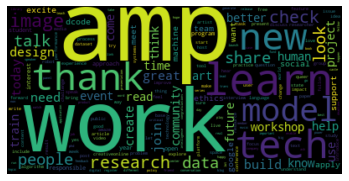

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
#stopwords.update(['amp','work','learn','know']) #adding our own stopwords
customStopwords=list(STOPWORDS)+ ['amp','learn','know', 'new','better','help']
#Creating the text variable
text = " ".join(tokens for tokens in df.tokens)
# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False, stopwords = customStopwords, background_color = 'black').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

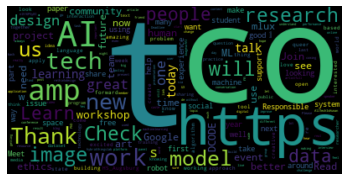

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
stopwords.update(['amp','work','learn','know']) #adding our own stopwords
#Creating the text variable
text = " ".join(tweet for tweet in df.tweet)
# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False, background_color = 'black').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

(-0.5, 2999.5, 1999.5, -0.5)

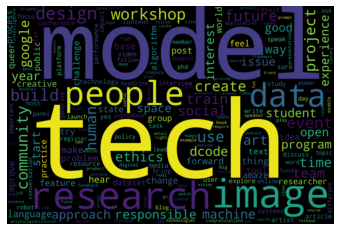

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
#stopwords.update(['amp','work','learn','know']) #adding our own stopwords
customStopwords=list(STOPWORDS)+ ['amp','learn','know', 'new','better','help','look', 'talk', 'share', 'thank', 'work', 'come', 'apply','understand','join', 'free','want', 'love', 'support', 'present', 'include', 'week', 'question', 'meet', 'today', 'need', 'read','check','think', 'excite', 'live', 'paper','great']
#Creating the text variable
text = " ".join(tokens for tokens in df.tokens)
# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False,width = 3000, height = 2000, stopwords = customStopwords, background_color = 'black').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud2, interpolation='bilinear')
#plt.figure(figsize=[8,10])
plt.axis("off")
#plt.show()

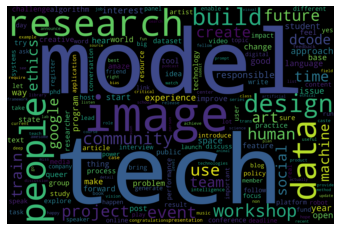

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
#stopwords.update(['amp','work','learn','know']) #adding our own stopwords
customStopwords=list(STOPWORDS)+ ['amp','learn','know', 'new','better','help','look', 'talk', 'share', 'thank', 'work', 'come', 'apply','understand','join', 'free','want', 'love', 'support', 'present', 'include', 'week', 'question', 'meet', 'today', 'need', 'read','check','think', 'excite', 'live', 'paper','great']
#Creating the text variable
text = " ".join(tokens for tokens in df.tokens)
# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False,width = 3000, height = 2000, stopwords = customStopwords, background_color = 'black').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud2, interpolation='bilinear')
#plt.figure(figsize=[8,10])
plt.axis("off")
plt.savefig('AIxDesignLogo1.png', format='png')
plt.show()

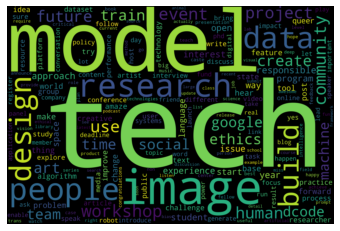

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
customStopwords=list(STOPWORDS)+ ['amp','learn','know', 'new','better','help','look', 'talk', 'share', 'thank', 'work', 'come', 'apply','understand','join', 'free','want', 'love', 'support', 'present', 'include', 'week', 'question', 'meet', 'today', 'need', 'read','check','think', 'excite', 'live', 'paper','great', 'feel', 'good']
#Creating the text variable
mask = np.array(Image.open('C:/Users/Karthika Preethi/Twitter.png'))
text = " ".join(tokens for tokens in df.tokens)
# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False,width = 3000, height = 2000, stopwords = customStopwords, background_color = 'black').generate(text)
# Display the generated Word Cloud
plt.figure()
plt.imshow(word_cloud2, interpolation='bilinear')
#plt.figure(figsize=[8,10])
plt.axis('off')
plt.savefig('twitter.png', format='png')
plt.show()